In [2]:
import seaborn as sns
df = sns.load_dataset("mpg")

In [ ]:
df.head()

In [4]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [5]:
df["horsepower"].fillna(df["horsepower"].median(), inplace=True)
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
df.duplicated().sum()

0

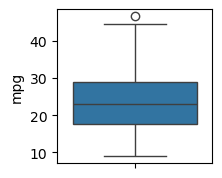

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
sns.boxplot(df["mpg"])
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
cat_cols = ["name", "origin"]
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,2,49
1,15.0,8,350.0,165.0,3693,11.5,70,2,36
2,18.0,8,318.0,150.0,3436,11.0,70,2,231
3,16.0,8,304.0,150.0,3433,12.0,70,2,14
4,17.0,8,302.0,140.0,3449,10.5,70,2,161


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_cols = df.drop(columns=["mpg"]).columns
df[feature_cols] = scaler.fit_transform(df[feature_cols])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,0.710825,-1.113745
1,15.0,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,0.710825,-1.259185
2,18.0,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,0.710825,0.922428
3,16.0,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,0.710825,-1.505316
4,17.0,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,0.710825,0.139285


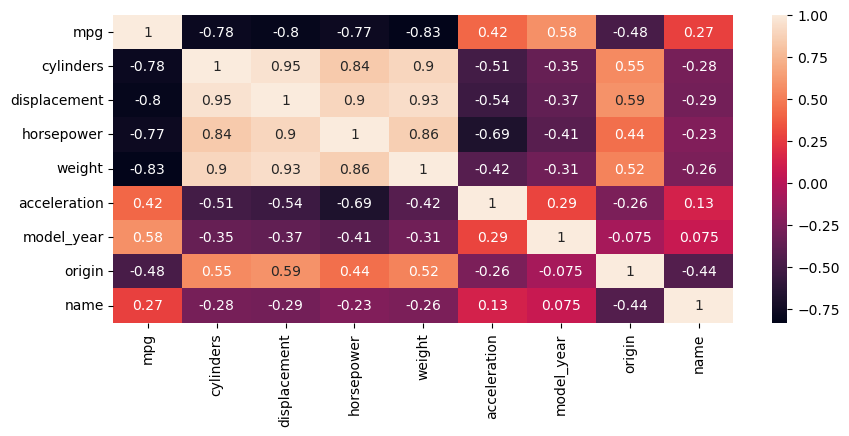

In [13]:
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X = df[feature_cols]
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



(318, 8) (80, 8) (318,) (80,)


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(list(y_test[:5]))
print(list(y_pred[:5]))

[33.0, 28.0, 19.0, 13.0, 14.0]
[31.69540061400616, 29.7204073395555, 20.95625545881288, 17.387849810102207, 12.746350173796253]


In [17]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)

print(r2, mae, mse, rmse)

0.8348551024405897 2.42831372695636 8.879253845227549 2.9798076859467875


For classification compare different models with respect to accuracy, precision, recall, f1 score by plotting them to bar graph
For regression create multiple models and compare by plotting rsquare, mean absolute error, mean squared error, root mean squared error